In [ ]:
import cv2
import os
import numpy as np
from matplotlib import colors
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/siamese-registration')

from datasets import RandomTransformationDataset
from models import *
from utils import get_transformation_matrix

In [ ]:
path = "/content/drive/MyDrive/data"
output_path = "/content/drive/MyDrive/outputs"

In [ ]:
dataset = RandomTransformationDataset(
    transforms=transforms.Compose([
        transforms.ToTensor(),
    ]),
    path=os.path.join(path, "train.pkl"),
    path_prefix="/content/drive/MyDrive"
)

In [ ]:
loader = iter(DataLoader(dataset, batch_size=8, num_workers=1, shuffle=True))

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
img0, img1, params = next(loader)
img0, img1, params = img0.to(device=device), img1.to(device=device), params.to(device=device)
image0 = img0.detach().numpy()[0, 0, :, :]
image1 = img1.detach().numpy()[0, 0, :, :]

In [ ]:
def visualize_imgs(imgs, labels, row=3, cols=11,):
    #imgs = imgs.detach().numpy().transpose(0, 2,3,1)
    # now we need to unnormalize our images. 
    fig = plt.figure(figsize=(12,12))
    plt.subplots_adjust(wspace=0, hspace=0)
    for i in range(imgs.shape[0]):
        ax = fig.add_subplot(row, cols, i+1, xticks=[], yticks=[])
        # if your images are 1 channel only, remove the channel dimension
        # so that matplotlib can work with it (e.g. change  28x28x1 to 28x28!)
        # like this ax.imshow(imgs[i].squeeze(), cmap='gray')
        img = imgs[i].detach().numpy()[0, :, :]
        norm = colors.LogNorm(img.mean() + 0.5 * img.std(), img.max(), clip='True')
        ax.imshow(img, cmap="gray")
        #ax.set_title(labels[i].item())
    plt.show()

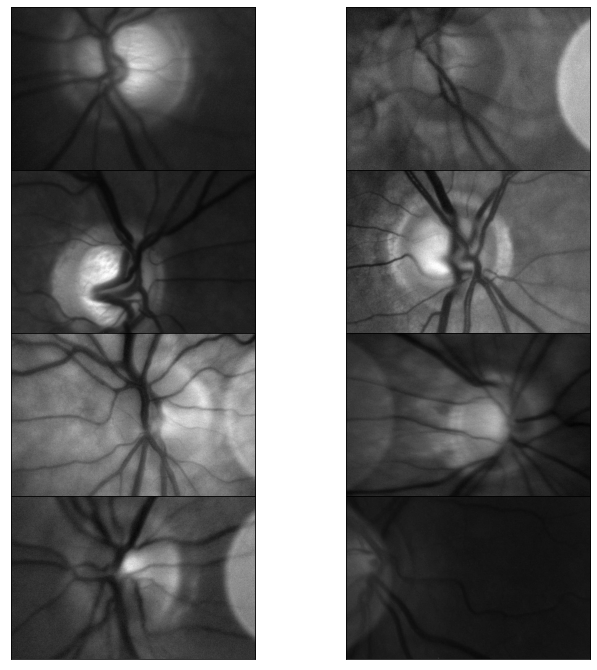

In [ ]:
visualize_imgs(img0, None, row=4, cols=2)

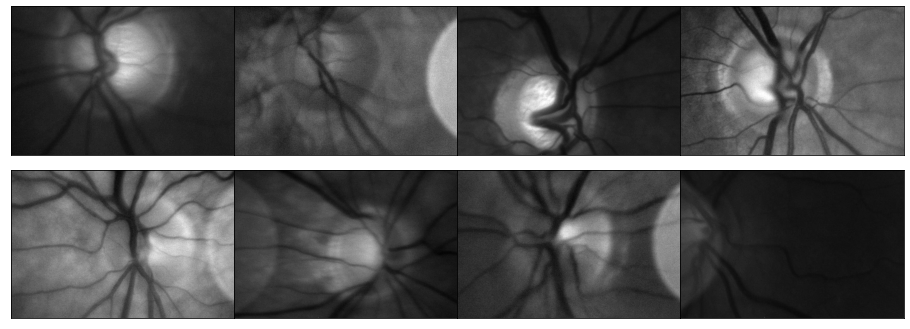

In [ ]:
row=2
cols=4
fig = plt.figure(figsize=(16,6))
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(img0.shape[0]):
    ax = fig.add_subplot(row, cols, i+1, xticks=[], yticks=[])
    img = img0[i].detach().numpy()[0, :, :]
    norm = colors.LogNorm(img.mean() + 0.5 * img.std(), img.max(), clip='True')
    ax.imshow(img, cmap="gray")
#plt.show()
plt.savefig(os.path.join("/content/drive/MyDrive/plots", "sample_images.png"))

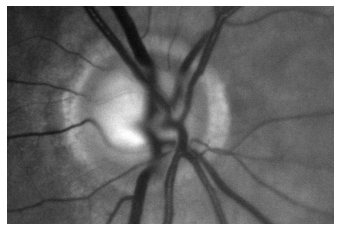

In [ ]:
fig = plt.figure()
plt.axis('off')
plt.imshow(img0[3].detach().numpy()[0, :, :], cmap="gray")
plt.savefig(os.path.join("/content/drive/MyDrive/plots", "input0.png"))

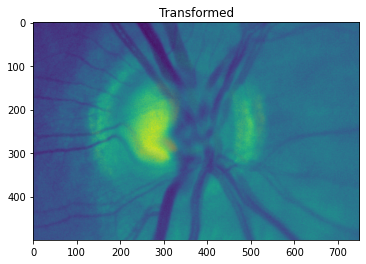

In [ ]:
plt.figure()
plt.title('Transformed')
plt.imshow(img0[3].detach().numpy()[0, :, :])
plt.imshow(img1[3].detach().numpy()[0, :, :], alpha=0.4)
#plt.savefig(os.path.join("/content/drive/MyDrive/plots", "sample_images.png"))

In [ ]:
test_dataset = RandomTransformationDataset(
    transforms=transforms.Compose([
        transforms.ToTensor(),
    ]),
    path=os.path.join(path, "test.pkl"),
    path_prefix="/content/drive/MyDrive"
)

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=1, num_workers=1, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from tqdm import tqdm

In [ ]:
checkpoint = "model-9.pt"
model = siamese_resnet18(1, 7)
model.load_state_dict(torch.load(os.path.join(output_path, checkpoint), map_location=device))
model.eval()

SiameseResNet(
  (encoder): ResNetEncoder(
    (gate): Sequential(
      (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (blocks): ModuleList(
      (0): ResNetLayer(
        (blocks): Sequential(
          (0): ResNetBasicBlock(
            (blocks): Sequential(
              (0): Sequential(
                (conv): Conv2dAuto(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (1): ReLU()
              (2): Sequential(
                (conv): Conv2dAuto(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [ ]:
param_list = []
output_list = []

with tqdm(test_loader) as validation_progress:
    for img0, img1, params in validation_progress:
        img0, img1, params = img0.to(device=device), img1.to(device=device), params.to(device=device)
        outputs = model(img0, img1)
        param_list.append(params.detach().numpy().reshape(-1).tolist())
        output_list.append(outputs.detach().numpy().reshape(-1).tolist())

  0%|          | 9/8000 [00:18<4:38:57,  2.09s/it]


KeyboardInterrupt: ignored

[[-12.65863037109375,
  -12.441633224487305,
  0.9740854501724243,
  1.0315688848495483,
  -0.023609686642885208,
  0.08523109555244446,
  0.0016558693023398519],
 [-39.10976791381836,
  -18.35197639465332,
  1.035915732383728,
  1.001957893371582,
  0.08509977906942368,
  0.05151759460568428,
  -0.12236650288105011],
 [-31.729656219482422,
  -4.272207260131836,
  0.9910686016082764,
  0.9746477007865906,
  0.006145892199128866,
  0.08701577037572861,
  -0.159728541970253],
 [25.843624114990234,
  13.956043243408203,
  1.0497266054153442,
  1.0049394369125366,
  -0.09520363807678223,
  0.08018739521503448,
  -0.030903974547982216],
 [12.035402297973633,
  21.61509895324707,
  0.9613867998123169,
  1.0160853862762451,
  -0.043078236281871796,
  -0.005828856490552425,
  0.1436353176832199],
 [-20.417293548583984,
  -7.150055408477783,
  1.0370572805404663,
  1.0128127336502075,
  0.008982410654425621,
  0.06537525355815887,
  -0.13682065904140472],
 [1.3854436874389648,
  43.490249633789